# Final Project - Introduction to Data Science

**Team members:**

1. Nguyễn Hoàng Trung Kiên (Leader) - 22127478

2. Quách Trần Quán Vinh - 22127460

3. Ngô Hải Bằng - 22127460

# I. Data exploring

### Importing libraries

In [235]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 0. Read data

In [236]:
df = pd.read_csv('houses.csv')
df

,Price,Rooms,Type,Status,Parking Spaces,Land Size,Building Size,Architecture Style,County,Provider
0,"USD $2,200 per month","3 bedroom(s), 2 bathroom(s)",House,Active,NaN,NaN,136.20 m2,Other,Mohave,"Black Mountain Valley Realty, Inc"
1,"USD $3,000 per month","2 bedroom(s), 3 bathroom(s)",Apartment,Active,NaN,161.87 m2,205.13 m2,Other,PHILADELPHIA,Compass
2,"USD $1,195 per month","1 bedroom(s), 1 bathroom(s)",Apartment,Active,NaN,768.90 m2,NaN,Other,PHILADELPHIA,OCF Realty
3,"USD $8,000 per month","4 bedroom(s), 3 bathroom(s)",Townhouse,Active,NaN,728.43 m2,213.68 m2,Other,Ventura,eXp Realty of California Inc.
4,"USD $5,600 per month","4 bedroom(s), 3 bathroom(s), 1 basement(s)",House,Active,4.0,849.84 m2,266.72 m2,Colonial,FAIRFAX,Keller Williams Fairfax Gateway
...,...,...,...,...,...,...,...,...,...,...
3995,"USD $2,050 per month","3 bedroom(s), 2 bathroom(s)",Other,Active,NaN,566.56 m2,175.03 m2,Contemporary,Maricopa,Realty ONE Group
3996,"USD $1,300 per month","2 bedroom(s), 1 bathroom(s)",Other,Active,NaN,930.78 m2,104.98 m2,Ranch,Maricopa,Real Living SJ Fowler Real Estate
3997,"USD $3,499 per month","4 bedroom(s), 3 bathroom(s)",Other,Active,NaN,890.31 m2,345.79 m2,Contemporary,Maricopa,HomeSmart
3998,"USD $10,900 per month","5 bedroom(s), 7 bathroom(s)",Other,Active,NaN,"1,254.53 m2",653.94 m2,Other,Maricopa,Russ Lyon Sotheby's International Realty


## 1. Meaning of columns/rows
Each row corresponds to a house with the following features:
- **Price:** Monthly rental price of the property in USD.
- **Rooms:** Number of bedrooms and bathrooms (may include basements).
- **Type:** Type of property (e.g., House, Apartment, Townhouse, etc.).
- **Status:** Current status of the property (e.g., "Active").
- **Parking Spaces:** Number of parking spaces (can be empty if unknown).
- **Land Size:** Size of the land (in $m^2$).
- **Building Size:** Size of the building (in $m^2$).
- **Architecture Style:** Style of the property’s architecture (e.g., Colonial, Contemporary, Other).
- **County:** County in which the property is located.
- **Provider:** Name of the real estate agency or company listing the property.


##  2. Data conversion
What is the current data type of each column? Are there columns having inappropriate data types?

In [237]:
df.dtypes

Price                  object
Rooms                  object
Type                   object
Status                 object
Parking Spaces        float64
Land Size              object
Building Size          object
Architecture Style     object
County                 object
Provider               object
dtype: object

As we can see, there are some inappropriate type for some features.

- First, `Price`, `Building Size` and `Land Size` are currently in string type, so we need to convert them to float.

In [238]:
for i in range(len(df['Price'])):
    if df['Price'][i] != df['Price'][i]:
        df['Price'] = df['Price'].apply(lambda x: float(x.split('$')[1].split(' ')[0].replace(',', '')) if isinstance(x, str) else x)

In [239]:
for i in range(len(df['Building Size'])):
    if df['Building Size'][i] != df['Building Size'][i]:
        df['Building Size'] = df['Building Size'].apply(lambda x: float(x.split(' ')[0].replace(',', '')) if isinstance(x, str) else x)

In [240]:
for i in range(len(df['Land Size'])):
    if df['Land Size'][i] != df['Land Size'][i]:
        df['Land Size'] = df['Land Size'].apply(lambda x: float(x.split(' ')[0].replace(',', '')) if isinstance(x, str) else x)

- Then, `Rooms` has to be splitted into 3 columns namely `Bedrooms`, `Bathrooms`, `Livingrooms` and `Basements`

In [241]:
bedrooms = df['Rooms'].apply(lambda x: int(re.search(r'(\d+) bedroom\(s\)', x).group(1)) if isinstance(x, str) and re.search(r'(\d+) bedroom\(s\)', x) else np.nan)
bathrooms = df['Rooms'].apply(lambda x: int(re.search(r'(\d+) bathroom\(s\)', x).group(1)) if isinstance(x, str) and re.search(r'(\d+) bathroom\(s\)', x) else np.nan)
livingrooms = df['Rooms'].apply(lambda x: int(re.search(r'(\d+) livingroom\(s\)', x).group(1)) if isinstance(x, str) and re.search(r'(\d+) livingroom\(s\)', x) else np.nan)
basements = df['Rooms'].apply(lambda x: int(re.search(r'(\d+) basement\(s\)', x).group(1)) if isinstance(x, str) and re.search(r'(\d+) basement\(s\)', x) else np.nan)

df['Bedrooms'] = bedrooms
df['Bathrooms'] = bathrooms
df['Livingrooms'] = livingrooms
df['Basements'] = basements

df = df.drop(columns=['Rooms'])

In [242]:
df.dtypes

Price                 float64
Type                   object
Status                 object
Parking Spaces        float64
Land Size             float64
Building Size         float64
Architecture Style     object
County                 object
Provider               object
Bedrooms              float64
Bathrooms             float64
Livingrooms           float64
Basements             float64
dtype: object

The data types seem normal.

# II. Data preprocessing
## 1. Data cleaning
### 1.1. Handle missing data

Is there any missing data in the dataset? If yes, is there any features has over 50% of missing values so that we should remove that features from the dataset?

,Total,Percentage
Basements,3695,0.92375
Livingrooms,3440,0.86000
Parking Spaces,2787,0.69675
Land Size,1576,0.39400
Building Size,421,0.10525
Bedrooms,321,0.08025
Bathrooms,223,0.05575
Provider,221,0.05525
County,164,0.04100
Price,22,0.00550


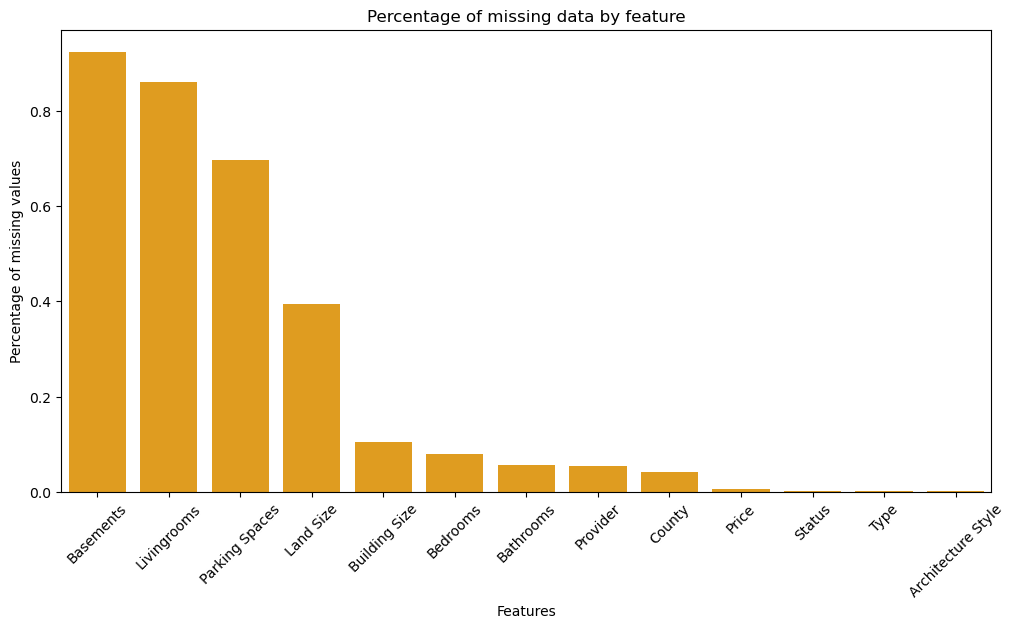

In [243]:
total = df.isna().sum().sort_values(ascending=False)
percentage = (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])

f = plt.figure(figsize=(12, 6))
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], color='orange')
plt.xlabel('Features')
plt.ylabel('Percentage of missing values')
plt.title('Percentage of missing data by feature')
plt.xticks(rotation=45)

missing_data

As we can see, the percentages of missing values of `Parking Spaces`, `Livingrooms` and `Basements` are greater than 50%, so we should remove these feature.

In [244]:
df.drop(columns=['Parking Spaces', 'Livingrooms', 'Basements'], inplace=True)

Since `Price` column is the target, we will remove the records that misses `Price` value.

In [245]:
df.dropna(subset=['Price'], inplace=True)

Before filling the missing values, we observe the numeric features distribution to choose the appropriate methods for that features.

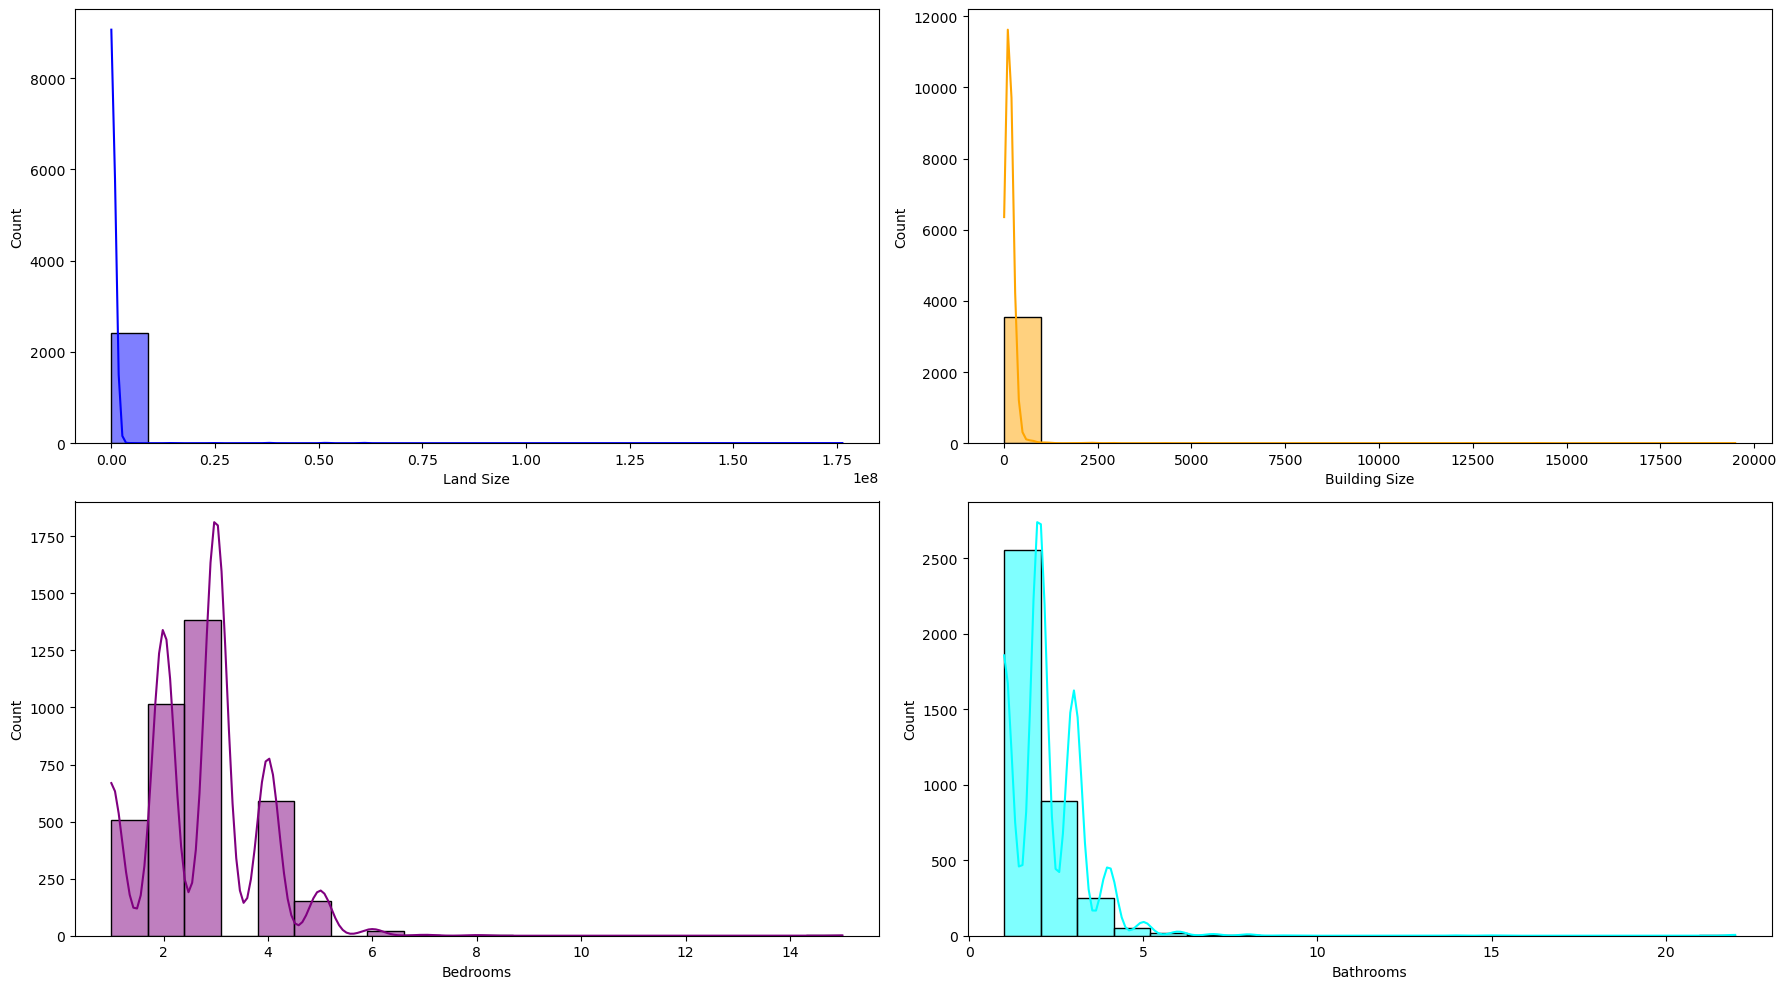

In [246]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18, 10))
sns.histplot(x=df['Land Size'], ax=axes[0, 0], kde=True, bins=20, color='blue')
sns.histplot(x=df['Building Size'], ax=axes[0, 1], kde=True, bins=20, color='orange')
sns.histplot(x=df['Bedrooms'], ax=axes[1, 0], kde=True, bins=20, color='purple')
sns.histplot(x=df['Bathrooms'], ax=axes[1, 1], kde=True, bins=20, color='cyan')
plt.tight_layout()
plt.show()

- At first glance, all the features are left-skewed distributions. Therefore, we fill those numeric missing values with median.
- As for categorical missing values we fill with mode.

In [247]:
numerics = ['Land Size', 'Building Size', 'Bedrooms', 'Bathrooms']
cates = ['Provider', 'County', 'Status', 'Type', 'Architecture Style']

for numeric in numerics:
    if 'rooms' in numeric:
        df[numeric] = df[numeric].fillna(int(df[numeric].median()))
    else: 
        df[numeric] = df[numeric].fillna(df[numeric].median())
    
for cate in cates:
    df[cate] = df[cate].fillna(df[cate].mode()[0])

# df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3978 entries, 0 to 3977
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               3978 non-null   float64
 1   Type                3978 non-null   object 
 2   Status              3978 non-null   object 
 3   Land Size           3978 non-null   float64
 4   Building Size       3978 non-null   float64
 5   Architecture Style  3978 non-null   object 
 6   County              3978 non-null   object 
 7   Provider            3978 non-null   object 
 8   Bedrooms            3978 non-null   float64
 9   Bathrooms           3978 non-null   float64
dtypes: float64(5), object(5)
memory usage: 310.9+ KB


Finally, there is no more missing values.

### 1.2. Handle Duplicate Rows
Is there any duplicated rows (same features)? If yes, remove those rows.

In [249]:
df.duplicated(df.columns.difference(['Price'])).sum()

np.int64(206)

In [250]:
df.drop_duplicates(df.columns.difference(['Price']), keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

Extract data for making meaningful questions later.

In [251]:
df.to_csv('houses_for_exploring.csv', index=False)

## 2. Features selection

Since there are continuous and categorical features in this dataset, we will use 2 techniques for features selection:
- **Pearson Correlation** for numeric features and numeric target (`Price`).

<Axes: >

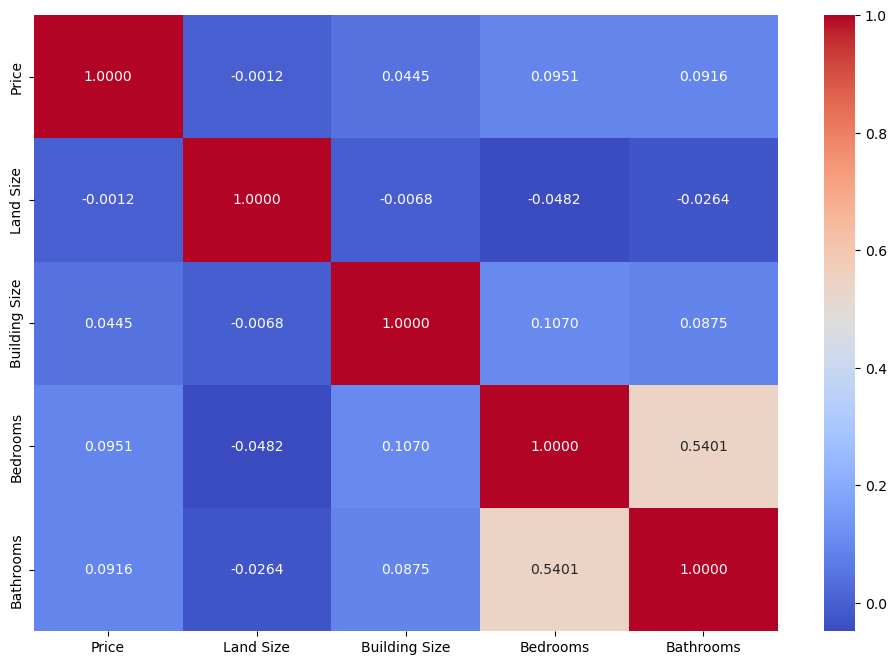

In [252]:
corr_matrix = df.select_dtypes(['number']).corr()

plt.figure(figsize=(12, 8))    
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".4f")

- To remove redundant features, we will remove those insignificant features to the target (correlation ~ 0).  
- As we can see, `Land Size` is insignificant feature to the target, because its correlation with the target is nearly 0. 

In [253]:
df.drop(columns=['Land Size'], inplace=True)

- **ANOVA test** for categorical features and numeric target (`Price`).

In [254]:
anova_scores = {}
target = df['Price']

anova_scores = []
for cate in cates:
    groups = [target[df[cate] == category] for category in df[cate].unique()]
    
    anova_scores.append(f_oneway(*groups).pvalue)
    
anova_scores_df = pd.DataFrame(anova_scores, index=cates, columns=['p-value'])
anova_scores_df

,p-value
Provider,9.096732e-72
County,3.832089e-215
Status,7.945949e-01
Type,5.618750e-04
Architecture Style,9.999882e-01


- To remove redundant features, we will remove those insignificant features to the target (p-value > $0.05$).  
- As we can see, `Status` and `Architecture Style` are insignificant features to the target, because those p-values are greater than $0.05$. 

In [255]:
df.drop(columns=anova_scores_df[anova_scores_df['p-value'] > 0.05].index, inplace=True)

## 3. Encode categorical columns

First, we check how many distinct values are there in each columns to decide which methods of encoding is suitable.

In [256]:
cates = ['Provider', 'County', 'Type']
distinct_values = {col: df[col].unique() for col in cates}  
for col, values in distinct_values.items():
    print(f"Column '{col}' has {len(values)} values")

Column 'Provider' has 1933 values
Column 'County' has 472 values
Column 'Type' has 6 values


- So each categorical column has high distinct values.
- Using **One-hot encoding** will be less effective. Instead, we will use **Mean encoding** that will encode each category based on the mean of the target variable. This approach helps reduce the dimensionality of the data while still retaining information about the relationship between the categorical variable and the target.

In [257]:
target = 'Price'  
encoded_cols = {}
for col in ['Provider', 'County', 'Type']:  
    category_means = df.groupby(col)[target].mean()
    encoded_cols[col] = df[col].map(category_means).fillna(df[target].mean())
    
for col, encoded_values in encoded_cols.items():
    df[col] = encoded_values

## 4. Data normalization

There are some numeric columns that have different scales, so normalization is necessary.

- We use **Standard scaling** for normalization. Because the data has different scales (for example, ```Building size``` has range (0-20000), while ```Bedrooms``` has range (0-14). That method can also enhance model performance since we intend to use some Distance-based models (e.g., Regression...), makes it suitable for use when the target variable is continuous.

In [258]:
numerics = ['Building Size', 'Bedrooms', 'Bathrooms', 'Type', 'County', 'Provider']
scaler = preprocessing.StandardScaler()
df[numerics] = scaler.fit_transform(df[numerics])

Data distribution after normalization.

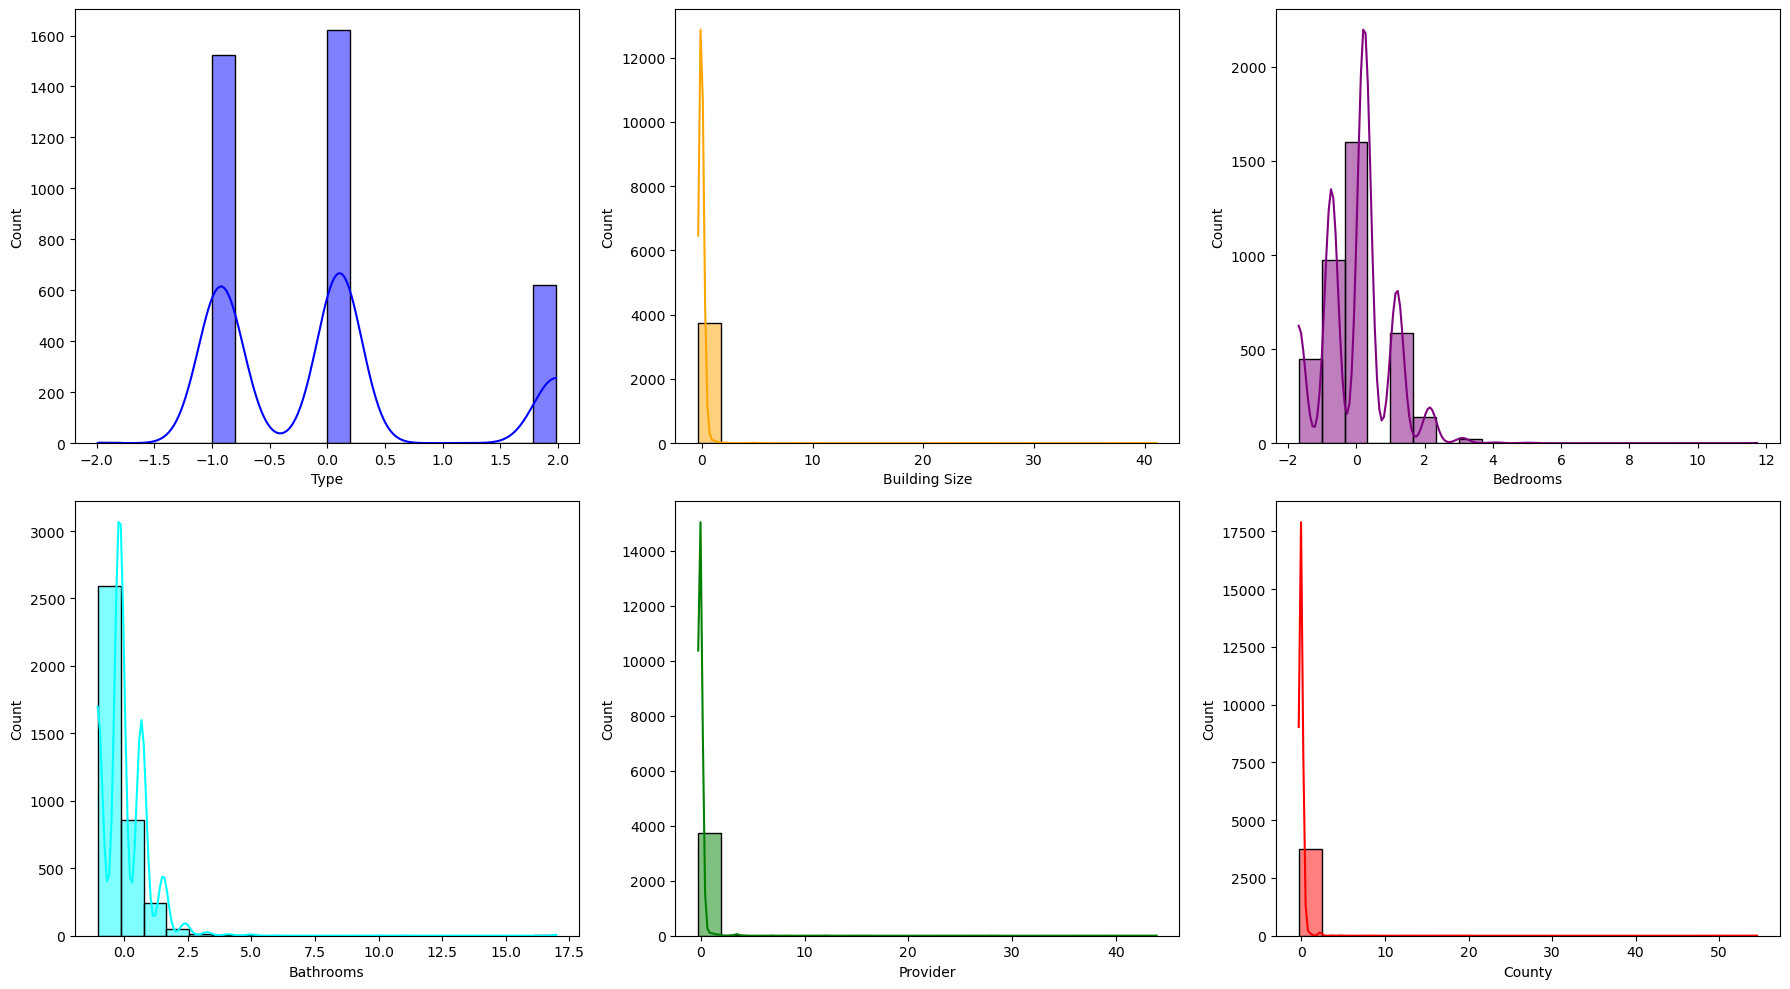

In [259]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  
sns.histplot(x=df['Type'], ax=axes[0, 0], kde=True, bins=20, color='blue')
sns.histplot(x=df['Building Size'], ax=axes[0, 1], kde=True, bins=20, color='orange')
sns.histplot(x=df['Bedrooms'], ax=axes[0, 2], kde=True, bins=20, color='purple')
sns.histplot(x=df['Bathrooms'], ax=axes[1, 0], kde=True, bins=20, color='cyan')
sns.histplot(x=df['Provider'], ax=axes[1, 1], kde=True, bins=20, color='green')
sns.histplot(x=df['County'], ax=axes[1, 2], kde=True, bins=20, color='red')
plt.tight_layout()
plt.show()


In [260]:
df

,Price,Type,Building Size,County,Provider,Bedrooms,Bathrooms
0,2200.0,0.106584,-0.072131,-0.171821,-0.109710,0.233064,-0.178060
1,3000.0,-0.890268,0.074385,0.089312,0.018489,-0.725626,0.679722
2,1195.0,-0.890268,-0.078848,0.089312,-0.120091,-1.684317,-1.035842
3,8000.0,-0.960841,0.092558,0.132349,0.142491,1.191755,0.679722
4,5600.0,0.106584,0.205299,-0.066366,-0.011176,1.191755,0.679722
...,...,...,...,...,...,...,...
3767,2050.0,1.982545,0.010405,-0.051731,-0.115957,0.233064,-0.178060
3768,1300.0,1.982545,-0.138491,-0.051731,-0.164256,-0.725626,-1.035842
3769,3499.0,1.982545,0.373367,-0.051731,0.045279,1.191755,0.679722
3770,10900.0,1.982545,1.028362,-0.051731,0.119031,2.150445,4.110850


## 5. Detect multicollinearity

In [261]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

vif_data

,feature,VIF
0,Price,3.112200
1,Type,1.064078
2,Building Size,1.022831
3,County,2.820546
4,Provider,4.862769
5,Bedrooms,1.491065
6,Bathrooms,1.433561


Save the modified dataset to `.csv` file.

In [262]:
df.to_csv('houses_after_preprocessing.csv', index=False)